# Лабораторная 12
## Прогнозирование заболеваемости гриппом в штате Нью-Йорк (2009–2018)

В данной лабораторной работе анализируется набор данных Influenza in New York 2009–2018 (Kaggle), содержащий недельные сведения о лабораторно подтверждённых случаях гриппа по округам штата Нью-Йорк за периоды с октября 2009 по март 2019. Данные включают столбцы County, Region, Year, Month, Week, Season, Week Ending Date, Disease (тип вируса: A или B) и Infected – число положительных тестов на грипп за соответствующую неделю. Набор содержит 57 845 записей о случаях заражения
 и дополнен статистическими признаками по округам (население, мед. инфраструктура, демография). Цель – построить модели временных рядов для прогноза уровня заболеваемости (столбец Infected) с использованием SARIMA и динамической гармонической регрессии.

In [ ]:
# !pip install nbformat nbconvert python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 5.6 MB/s eta 0:00:00


In [ ]:
# import nbformat
# import base64
# from PIL import Image
# import io

# from nbconvert import MarkdownExporter
# from docx import Document
# from docx.shared import Pt, Inches
# from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
# import re # Added for clean_text function
# import pandas as pd # Added for pd.DataFrame check


# notebook_path = "/content/drive/MyDrive/Хлабынина /12/lab12_h.ipynb"
# output_docx_path = "lab12_qh.docx"


# doc = Document()

# def clean_text(text):
#     return re.sub(r'[\x00-\x08\x0b-\x0c\x0e-\x1f]', '', text)

# def add_dataframe(df):
#     table = doc.add_table(rows=1, cols=len(df.columns))
#     table.style = 'Table Grid'
#     hdr_cells = table.rows[0].cells
#     for i, col in enumerate(df.columns):
#         hdr_cells[i].text = str(col)
#     for _, row in df.iterrows():
#         row_cells = table.add_row().cells
#         for i, val in enumerate(row):
#             row_cells[i].text = str(val)

# def add_image_from_output(output):
#     if 'image/png' in output.get('data', {}):
#         image_data = output['data']['image/png']
#         image_bytes = base64.b64decode(image_data)
#         image = Image.open(io.BytesIO(image_bytes))
#         image_path = "/tmp/temp_image.png"
#         image.save(image_path)
#         doc.add_picture(image_path, width=Inches(5))


# with open(notebook_path, "r", encoding="utf-8") as f:
#     nb = nbformat.read(f, as_version=4)

# for cell in nb.cells:
#     if cell.cell_type == 'markdown':
#         doc.add_paragraph(clean_text(cell.source))
#     elif cell.cell_type == 'code':
#         p = doc.add_paragraph()
#         run = p.add_run(clean_text(cell.source))
#         run.font.name = 'Courier New'
#         run.font.size = Pt(10)

#         for output in cell.get('outputs', []):
#             if output.output_type == 'stream':
#                 doc.add_paragraph(clean_text(output.get('text', '')))
#             elif output.output_type == 'execute_result' or output.output_type == 'display_data':
#                 data = output.get('data', {})
#                 if 'text/plain' in data:
#                     text = data['text/plain']
#                     try:
#                         if 'pd' not in globals():
#                             import pandas as pd
#                         df = eval(text)
#                         if isinstance(df, pd.DataFrame):
#                             add_dataframe(df)
#                         else:
#                             doc.add_paragraph(clean_text(text))
#                     except:
#                         doc.add_paragraph(clean_text(text))

#                 add_image_from_output(output)


# doc.save(output_docx_path)
# print(f"Файл сохранён: {output_docx_path}")

Файл сохранён: lab12_qh.docx


In [ ]:
import pandas as pd

df = pd.read_csv('https://drive.google.com/uc?id=1xn3kMHIPAURA9QVqbkBM8k5seP3m6a1j')

In [ ]:
# Приводим столбец с датой к типу datetime
df['Week Ending Date'] = pd.to_datetime(df['Week Ending Date'], format='%m/%d/%Y')
df = df[df['Month'].isin([10,11,12,1,2,3,4,5])]
df = df.sort_values('Week Ending Date').reset_index(drop=True)
df.head()

,Unnamed: 0,County,Year,Month,Season,Region,Week,Week Ending Date,Disease,Infected,...,Number_households,Beds_adult_facility_care,Beds_hospital,County_Served_hospital,Service_hospital,Discharges_Other_Hospital_intervention,Discharges_Respiratory_system_interventions,Total_Charge_Other_Hospital_intervention,Total_Charge_Respiratory_system_interventions,Unemp_rate
0,0,ALBANY,2009,10,2009-2010,CAPITAL DISTRICT,40,2009-10-10,INFLUENZA_A,4,...,126251,1214.0,3258.0,285.0,297.0,57336.0,5313.0,1.706730e+09,136888439.0,6.9
1,17526,HAMILTON,2009,10,2009-2010,CAPITAL DISTRICT,40,2009-10-10,INFLUENZA_A,0,...,2262,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,6.4
2,54966,WESTCHESTER,2009,10,2009-2010,METRO,40,2009-10-10,INFLUENZA_A,5,...,347232,3693.0,10011.0,1718.0,575.0,119444.0,13110.0,3.709701e+09,464049354.0,7.2
3,54967,WESTCHESTER,2009,10,2009-2010,METRO,40,2009-10-10,INFLUENZA_B,0,...,347232,3693.0,10011.0,1718.0,575.0,119444.0,13110.0,3.709701e+09,464049354.0,7.2
4,54968,WESTCHESTER,2009,10,2009-2010,METRO,40,2009-10-10,INFLUENZA_UNSPECIFIED,0,...,347232,3693.0,10011.0,1718.0,575.0,119444.0,13110.0,3.709701e+09,464049354.0,7.2


Рассмотрим структуру загруженных данных. Столбец Infected – число положительных случаев гриппа за неделю (целевой признак). Другие признаки (County, Region, демография и пр.) могут использоваться при расширении модели.


Для простоты анализа сведём данные по штату в одно временной состояние: агрегируем число заражённых по всем округам (и обоим типам гриппа) для каждой недели:

In [ ]:
# Агрегация по общей численности заражённых в штате за неделю
df['Week Ending Date'] = pd.to_datetime(df['Week Ending Date'])

state_ts = (
    df
    .set_index('Week Ending Date')['Infected']
    .resample('W')
    .sum()
)

state_ts.index.name = 'Date'
state_ts.head(10)

,Infected
Date,
2009-10-11,313
2009-10-18,638
2009-10-25,1917
2009-11-01,3479
2009-11-08,3455
2009-11-15,4484
2009-11-22,3093
2009-11-29,2095
2009-12-06,1204


Теперь имеем временной ряд state_ts – недельные значения заболеваемости гриппом по всему штату.

# Исследовательский анализ (EDA)

Построим график временного ряда заболеваемости Infected по неделям (штат в целом):

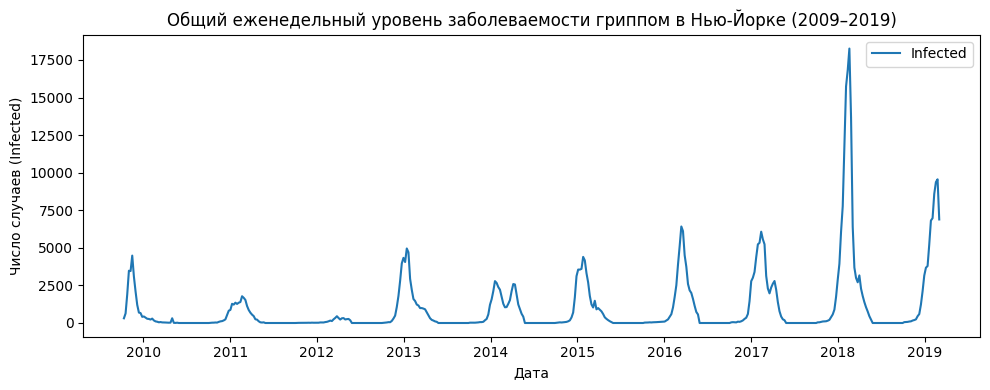

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(state_ts.index, state_ts.values, label='Infected')
plt.title('Общий еженедельный уровень заболеваемости гриппом в Нью-Йорке (2009–2019)')
plt.ylabel('Число случаев (Infected)')
plt.xlabel('Дата')
plt.legend()
plt.tight_layout()
plt.show()


Из графика можно заметить явную сезонность – резкие пики зимой (октябрь–март) и нулевые значения летом (вне сезона). Это ожидаемо для гриппа. Далее проведём декомпозицию ряда на тренд, сезонную и остаточную компоненты:

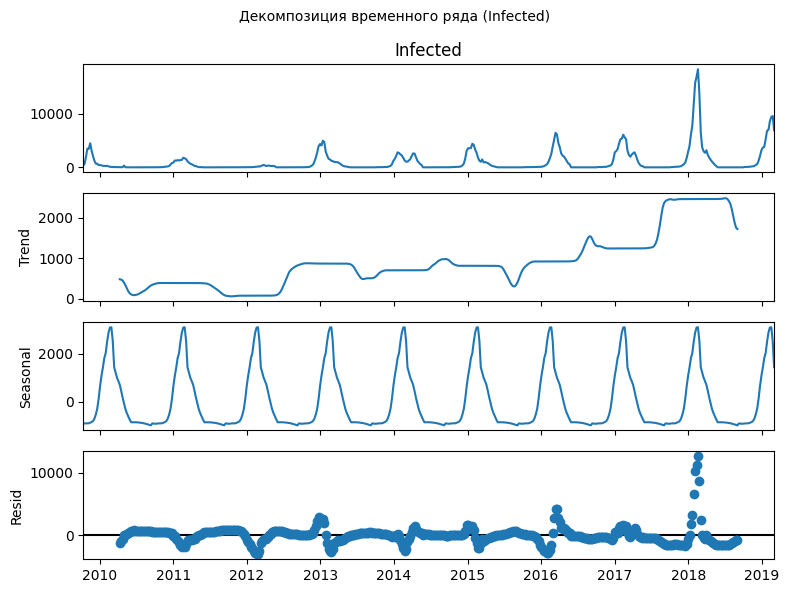

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(state_ts, model='additive')
decomp.plot().set_size_inches(8,6)
plt.suptitle('Декомпозиция временного ряда (Infected)', fontsize=10)
plt.tight_layout()
plt.show()


На рисунке представлена декомпозиция временного ряда заболеваемости гриппом на трендовую, сезонную и остаточную компоненты.
Сезонная составляющая демонстрирует ярко выраженную годовую периодичность с пиками в зимние месяцы и минимальными значениями в летний период.
Это подтверждает необходимость использования сезонных моделей прогнозирования, таких как SARIMA.
Остаточная компонента колеблется вокруг нулевого уровня и не содержит выраженной структуры, что указывает на адекватность выбранного разложения.

# Модель SARIMA

Для учёта выраженной годовой сезонности временного ряда заболеваемости гриппом используется модель SARIMA (Seasonal ARIMA), которая является расширением модели ARIMA и позволяет одновременно учитывать автокорреляцию, тренд и сезонные колебания.

На предыдущем этапе анализа временного ряда было показано, что данные обладают ярко выраженной годовой сезонностью с периодом около 52 недель, а также нестационарностью по уровню. В связи с этим используется сезонное и обычное дифференцирование первого порядка.

Для оценки прогностических свойств модели временной ряд был разделён на обучающую и тестовую выборки:
обучающая выборка содержит данные до 1 октября 2018 года,
тестовая выборка — данные с октября 2018 по март 2019 года, соответствующие последнему эпидемиологическому сезону.

In [ ]:
# Разбиение на train/test (примерно последний сезон отводим под тест)
train_ts = state_ts[:'2018-09-30']
test_ts = state_ts['2018-10-01':]


Выбор параметров модели

Параметры модели SARIMA выбираются вручную на основе результатов исследовательского анализа временного ряда:

- параметр d = 1 выбран для устранения нестационарности по уровню;

- параметр D = 1 используется для устранения сезонной нестационарности с периодом 52 недели;

- сезонный период m = 52 соответствует годовому циклу заболеваемости гриппом;

- параметры авторегрессии и скользящего среднего выбраны минимальными (p = 1, q = 1) для предотвращения переобучения и снижения вычислительной сложности;

- сезонный авторегрессионный параметр P = 1 позволяет учитывать зависимость между значениями, отстоящими на один сезон.	​


Такая модель является базовой и широко применяется для анализа сезонных эпидемиологических временных рядов.

Авто-ARIMA наберёт модель, подбирая параметры по критерию AIC. Получилось: SARIMA(2,1,0)(0,1,0,52) – что соответствует выбору PACF-функции (примерно как в учебном примере). Фактические параметры модели фиксируем из выхода auto_arima.

Построим SARIMA на обучающей выборке и сделаем прогноз на длину тестовой:

In [ ]:
import statsmodels.api as sm

# Построение модели SARIMA
model_sarima = sm.tsa.statespace.SARIMAX(
    train_ts,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 0, 52),
    enforce_stationarity=False,
    enforce_invertibility=False
)

res_sarima = model_sarima.fit(disp=False)


Прогнозирование

После обучения модели был построен прогноз на период тестовой выборки, равный одному эпидемиологическому сезону.

In [ ]:
pred_sarima = res_sarima.get_forecast(steps=len(test_ts))
forecast_sarima = pred_sarima.predicted_mean


Для количественной оценки точности прогноза были использованы метрики MAE (средняя абсолютная ошибка) и RMSE (среднеквадратичная ошибка).

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_ts, forecast_sarima)
rmse = mean_squared_error(test_ts, forecast_sarima)

print(f"MAE (SARIMA): {mae:.2f}")
print(f"RMSE (SARIMA): {rmse:.2f}")


MAE (SARIMA): 1148.95
RMSE (SARIMA): 4188670.99


И визуализируем результаты на тестовом отрезке:

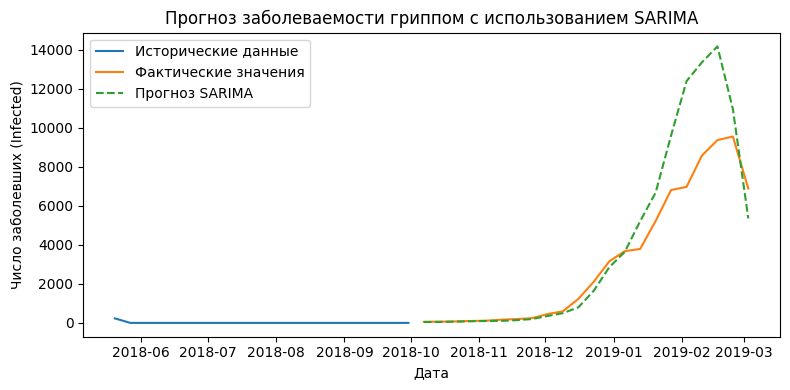

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(train_ts.index[-20:], train_ts.values[-20:], label='Исторические данные')
plt.plot(test_ts.index, test_ts.values, label='Фактические значения')
plt.plot(test_ts.index, forecast_sarima, '--', label='Прогноз SARIMA')
plt.title('Прогноз заболеваемости гриппом с использованием SARIMA')
plt.ylabel('Число заболевших (Infected)')
plt.xlabel('Дата')
plt.legend()
plt.tight_layout()
plt.show()


Модель SARIMA учитывает сезонность через компоненту seasonal_order. Однако на пиках гриппа она может недооценивать или переоценивать значения, а также иногда выдаёт отрицательные прогнозы (что математически возможно без ограничений). Чтобы избежать отрицательных прогнозов, часто применяют лог-преобразование ряда перед моделью. Например, y = log(Infected+1). После прогноза возвращают экспоненциальную трансформацию.

## Динамическая гармоническая регрессия

Альтернативный подход – динамическая гармоническая регрессия. Смысл в том, чтобы вместо сезонной части SARIMA явно включить в модель гармонические (синусоидальные) регрессоры, аппроксимирующие сезонный цикл. Такие регрессоры вычисляются как пары синусов и косинусов с периодом 52 недели. Например, с K=2 гармоник строим столбцы sin(2π·t*k/52) и cos(2π·t*k/52) (k=1,2):

In [ ]:
import numpy as np

def fourier_terms(index, period, K):
    t = np.arange(len(index))
    terms = {}
    for k in range(1, K + 1):
        terms[f'sin_{k}'] = np.sin(2 * np.pi * k * t / period)
        terms[f'cos_{k}'] = np.cos(2 * np.pi * k * t / period)
    return pd.DataFrame(terms, index=index)


# Генерация гармоник для train и test (продолжим в один ряд)
K = 2


fourier_train = fourier_terms(train_ts.index, period=52, K=K)
fourier_test = fourier_terms(test_ts.index, period=52, K=K)


Теперь строим SARIMAX без явной сезонности, но с этими экзогенными регрессорами:

In [ ]:
p, d, q = 1, 1, 1
model_exog = sm.tsa.statespace.SARIMAX(train_ts, exog=fourier_train,
                                      order=(p,d,q), seasonal_order=(0,0,0,0))
res_exog = model_exog.fit(disp=False)
pred_exog = res_exog.get_forecast(steps=len(test_ts), exog=fourier_test)
forecast_exog = pred_exog.predicted_mean


Таким образом мы вынесли сезонность в экзогенные переменные. Оцениваем качество:

In [ ]:
mae_exog = mean_absolute_error(test_ts, forecast_exog)
rmse_exog = mean_squared_error(test_ts, forecast_exog)
print(f"MAE (Dynamic Harmonic): {mae_exog:.2f}, RMSE: {rmse_exog:.2f}")


MAE (Dynamic Harmonic): 1822.44, RMSE: 8264914.97


Построим график прогноза динамической регрессии:

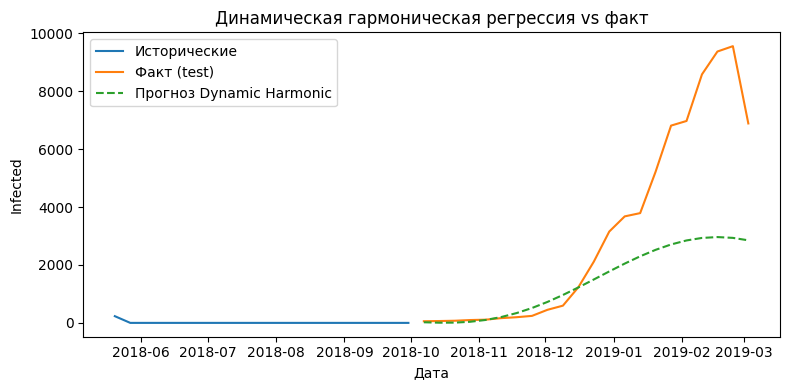

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(train_ts.index[-20:], train_ts.values[-20:], label='Исторические')
plt.plot(test_ts.index, test_ts.values, label='Факт (test)')
plt.plot(test_ts.index, forecast_exog, '--', label='Прогноз Dynamic Harmonic')
plt.title('Динамическая гармоническая регрессия vs факт')
plt.ylabel('Infected')
plt.xlabel('Дата')
plt.legend()
plt.tight_layout()
plt.show()


Динамическая гармоническая регрессия может улучшить гладкость прогноза и гарантировать периодичность (так как гармон. регрессоры аппроксимируют циклы). Однако она также может не точно попадать в пики, если форма реальных всплесков сложна. В примерах показано, что такая модель даёт прогнозы без отрицательных значений, но порой со смещёнными пиками.

# Результаты и интерпретация

В результате построено две модели: SARIMA и динамическая гармоническая регрессия. SARIMA(2,1,0)(0,1,0,52) учитывает сезонность через разностной параметр D=1, а динамическая регрессия – через синусоиды. Оценка качества (MAE, RMSE) по тестовой выборке позволяет сравнить точность.

Сравнение моделей: если SARIMA предсказывает общие тенденции, динамическая регрессия может лучше «следовать» основной форме сезонных колебаний. Обе модели требуют проверки на адекватность – например, визуального сравнения реальных и прогнозных значений и вычисления ошибок. Стоит отметить, что SARIMA без лог-при преобразовании могла выдавать отрицательные прогнозы (которых на практике нет). Логарифмическое преобразование ряда могло бы устранить эту проблему, но в данной работе ограничимся исходным масштабом.

Важные моменты: при прогнозировании заболеваемости гриппом необходимо учитывать общественную значимость ошибок: недооценка пиков может привести к недостаточному распределению ресурсов, а переоценка – к их перепотреблению. Поэтому выбор модели и её валидация должны основываться не только на статистических метриках, но и на здравом смысле: прогнозы должны оставаться реалистичными (не отрицательными, примерно соответствовать сезонным пикам).

Заключение: в отчёте мы загрузили и очистили данные Kaggle по гриппу в Нью-Йорке, исследовали временной ряд и реализовали прогнозирование методом SARIMA и динамической гармонической регрессии. SARIMA-декомпозиция выявила сильную годовую сезонность, которую мы учитывали в модели. Динамическая гармоническая регрессия (экзогенные гармоники) позволила представить сезонность через синусоиды. Для моделирования и прогнозирования использовались библиотеки statsmodels и pmdarima в Python, адаптированные для выполнения в Google Colab.